In [ ]:
import torch
import torch.nn as nn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
!wget -nc https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv



--2022-06-16 03:48:37--  https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2302 (2.2K) [text/plain]
Saving to: ‘moore.csv’

moore.csv           100%[===================>]   2.25K  --.-KB/s    in 0s      

2022-06-16 03:48:38 (29.7 MB/s) - ‘moore.csv’ saved [2302/2302]



In [ ]:
data = pd.read_csv("moore.csv",header =None).values
X = data[:,0].reshape(-1,1)
Y = data[:,1].reshape(-1,1)

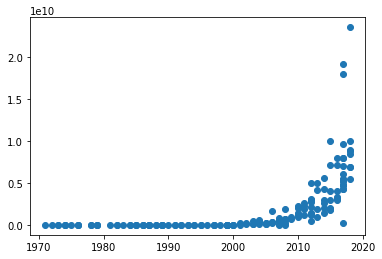

In [ ]:
plt.scatter(X,Y);

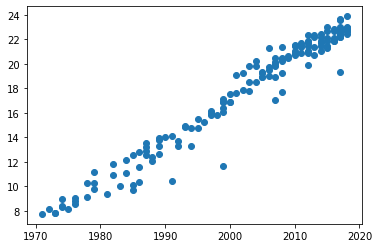

In [ ]:
# we want a linear model ,so taking log of Y
Y = np.log(Y)
plt.scatter(X,Y)


In [ ]:
#scaling the data
mx = X.mean()
sx = X.std()
my = Y.mean()
sy = Y.std()
X = (X-mx)/sx
Y = (Y-my)/sy

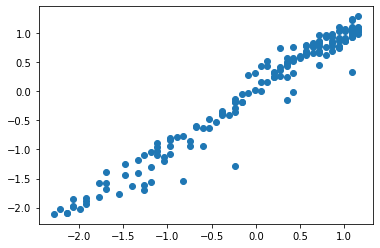

In [ ]:
plt.scatter(X,Y)

In [ ]:
# cast to float32
X = X.astype(np.float32)
Y = Y.astype(np.float32)

In [ ]:
# create the linear regression model
model = nn.Linear(1,1)

In [ ]:
#loss and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(),lr=0.01,momentum=0.7)

In [ ]:
inputs = torch.from_numpy(X)
targets = torch.from_numpy(Y)

In [ ]:
type(inputs)

torch.Tensor

In [ ]:
# train the model
n_epochs = 100
losses = []

for it in range(n_epochs):
  # zero the parameter gradient
  optimizer.zero_grad()

  # calculating the loss
  outputs = model(inputs)
  loss = criterion(outputs,targets)
  #record the loss
  losses.append(loss.item())

  # Backward and optimize
  loss.backward()
  optimizer.step()

  print(f"Epoch {it+1}/{n_epochs},loss:{loss.item():.4f}")













Epoch 1/100,loss:0.2523
Epoch 2/100,loss:0.2438
Epoch 3/100,loss:0.2300
Epoch 4/100,loss:0.2132
Epoch 5/100,loss:0.1952
Epoch 6/100,loss:0.1772
Epoch 7/100,loss:0.1601
Epoch 8/100,loss:0.1441
Epoch 9/100,loss:0.1297
Epoch 10/100,loss:0.1168
Epoch 11/100,loss:0.1054
Epoch 12/100,loss:0.0955
Epoch 13/100,loss:0.0869
Epoch 14/100,loss:0.0795
Epoch 15/100,loss:0.0731
Epoch 16/100,loss:0.0677
Epoch 17/100,loss:0.0631
Epoch 18/100,loss:0.0592
Epoch 19/100,loss:0.0559
Epoch 20/100,loss:0.0531
Epoch 21/100,loss:0.0508
Epoch 22/100,loss:0.0488
Epoch 23/100,loss:0.0471
Epoch 24/100,loss:0.0457
Epoch 25/100,loss:0.0446
Epoch 26/100,loss:0.0436
Epoch 27/100,loss:0.0428
Epoch 28/100,loss:0.0421
Epoch 29/100,loss:0.0415
Epoch 30/100,loss:0.0410
Epoch 31/100,loss:0.0406
Epoch 32/100,loss:0.0402
Epoch 33/100,loss:0.0400
Epoch 34/100,loss:0.0397
Epoch 35/100,loss:0.0395
Epoch 36/100,loss:0.0393
Epoch 37/100,loss:0.0392
Epoch 38/100,loss:0.0391
Epoch 39/100,loss:0.0390
Epoch 40/100,loss:0.0389
Epoch 41/

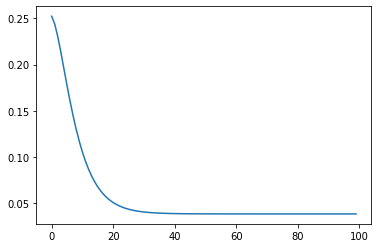

In [ ]:
plt.plot(losses)

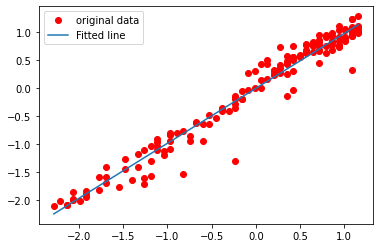

In [ ]:
predicted = model(torch.from_numpy(X)).detach().numpy()
plt.plot(X,Y,'ro',label="original data")
plt.plot(X,predicted,label="Fitted line")
plt.legend()


In [ ]:
# getting the best weights
w = model.weight.data.numpy()
w

array([[0.98050267]], dtype=float32)